In [1]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('darkgrid')
sns.set(font_scale = 1.4)

In [18]:
data = pd.read_csv('../results/Graphs_stuff/omega_sigma.csv',index_col=0)

def extract_N(string):
    x = string.split("_")
    numbers = '[-+]?\d*\.\d+|\d+'
    return int(re.findall(numbers,x[0])[0])

def extract_degree(x):
    x = x.split("_")
    numbers = '[-+]?\d*\.\d+|\d+'
    N = int(re.findall(numbers,x[0])[0])
    dens = re.findall(numbers,x[1])[0]
    return float(dens)**-1 * 2
    
data['N_Nodes'] = data.params.apply(extract_N)
data['Av_degree'] = data.params.apply(extract_degree)

data.head()

data_dgr = data.groupby(['Av_degree','type'],as_index = False).mean()

In [19]:
data = data.groupby(['N_Nodes','type'],as_index = False).mean()


In [20]:
data.sort_values(['N_Nodes','type'],ignore_index = True)

,N_Nodes,type,sigma,omega,std_sigma,std_omega,CUMUL_STD,Av_degree
0,100,BA,2.121764,0.708967,0.359910,0.035461,0.348065,9.28
1,100,ER,1.013147,0.854889,0.149677,0.021577,0.194423,9.28
2,100,WS,3.112763,0.106956,0.205644,0.049267,0.438706,9.28
3,100,geom,3.839980,-0.500551,0.312458,0.067497,0.611510,9.28
4,100,geom3d,4.963789,-0.223822,0.333767,0.059354,0.546120,9.28
5,100,power,4.704566,0.375896,0.388295,0.039290,0.385373,9.28
6,176,BA,2.583150,0.822483,0.438669,0.020749,0.236818,9.28
7,176,ER,1.026777,0.918293,0.138470,0.015257,0.138932,9.28
8,176,WS,5.000879,0.092210,0.261825,0.034616,0.324128,9.28
9,176,geom,5.353573,-0.577554,0.441406,0.049215,0.478582,9.28


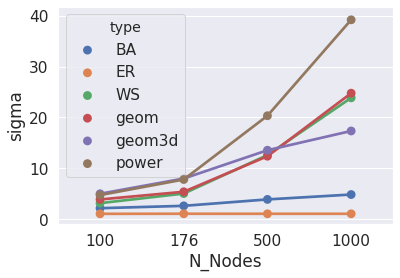

In [7]:
g = sns.pointplot(x = "N_Nodes", y = "sigma", data = data,
                  sizes = (15,200),hue = "type",alpha=.5,
                  facet_kws={'s':data['std_sigma'],'sharey': False, 'sharex': False})


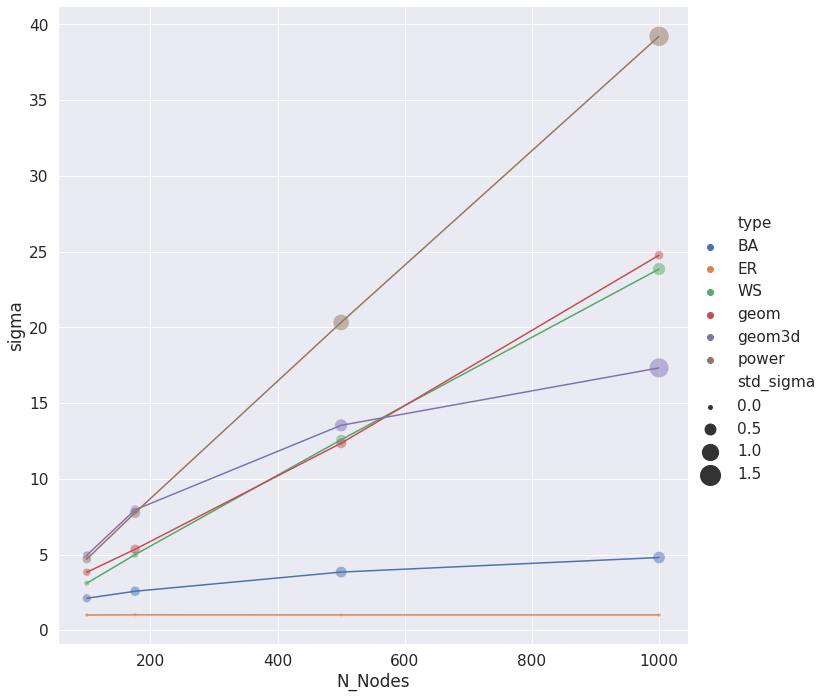

In [8]:

fg = sns.relplot(x = "N_Nodes", y = "sigma",size = "std_sigma",kind = 'scatter',
                data = data,sizes = (15,400),hue = "type",alpha=.5,height = 10,
                facet_kws={'sharey': False, 'sharex': False})
# subsets for all graphs : 
BA = data[data["type"] == "BA"]
ER = data[data["type"] == "ER"]
WS = data[data["type"] == "WS"]
geom = data[data["type"] == "geom"]
geom3d = data[data["type"] == "geom3d"]
power = data[data["type"] == "power"]
# add lines : 
fg.axes[0,0].plot(BA["N_Nodes"], BA["sigma"])
fg.axes[0,0].plot(ER["N_Nodes"], ER["sigma"])
fg.axes[0,0].plot(WS["N_Nodes"],WS["sigma"])
fg.axes[0,0].plot(geom["N_Nodes"], geom["sigma"])
fg.axes[0,0].plot(geom3d["N_Nodes"], geom3d["sigma"])
fg.axes[0,0].plot(power["N_Nodes"], power["sigma"])
plt.show()

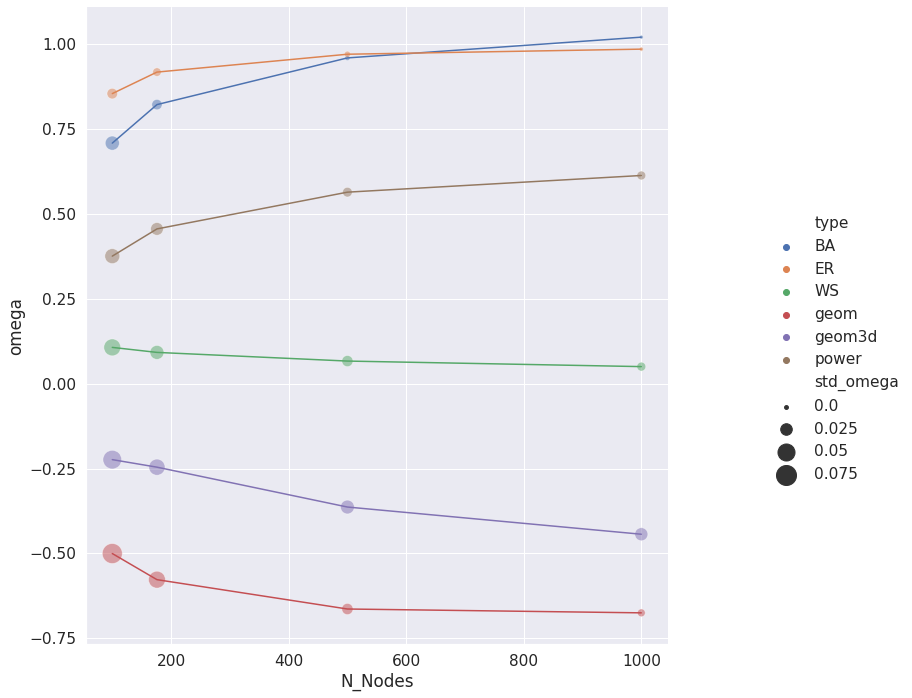

In [111]:

fg = sns.relplot(x = "N_Nodes", y = "omega",size = "std_omega",kind = 'scatter',
                data = data,sizes = (15,400),hue = "type",alpha=.5,height = 10,
                facet_kws={'sharey': False, 'sharex': False})
# subsets for all graphs : 
BA = data[data["type"] == "BA"]
ER = data[data["type"] == "ER"]
WS = data[data["type"] == "WS"]
geom = data[data["type"] == "geom"]
geom3d = data[data["type"] == "geom3d"]
power = data[data["type"] == "power"]
# add lines : 
fg.axes[0,0].plot(BA["N_Nodes"], BA["omega"])
fg.axes[0,0].plot(ER["N_Nodes"], ER["omega"])
fg.axes[0,0].plot(WS["N_Nodes"],WS["omega"])
fg.axes[0,0].plot(geom["N_Nodes"], geom["omega"])
fg.axes[0,0].plot(geom3d["N_Nodes"], geom3d["omega"])
fg.axes[0,0].plot(power["N_Nodes"], power["omega"])

#truncate legend texts:
leg = fg._legend
for t in leg.texts:
    if len(t.get_text()) > 9:
        t.set_text(t.get_text()[:5])
plt.show()

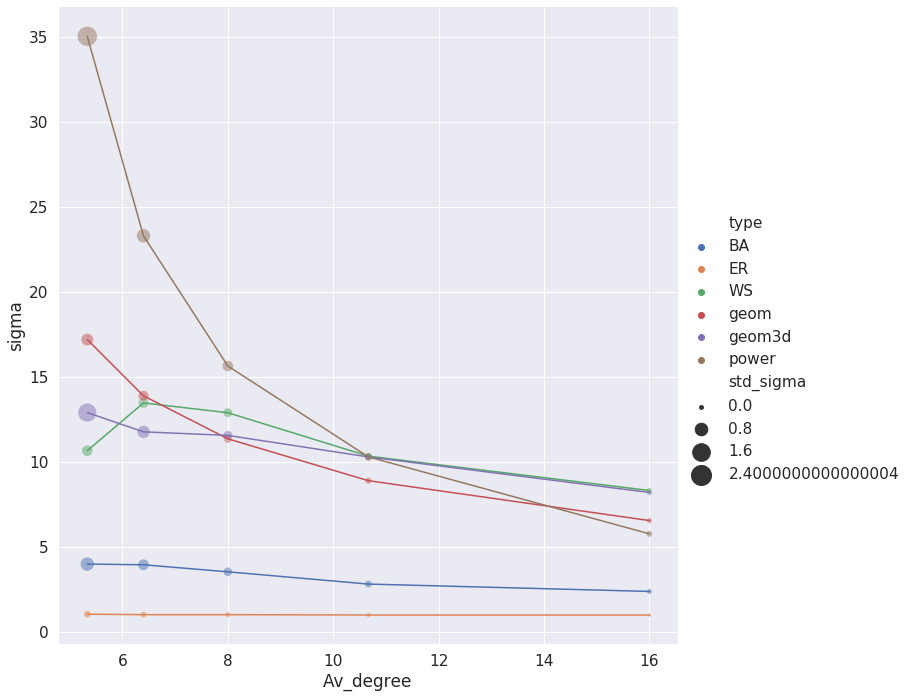

In [21]:
data = data_dgr
fg = sns.relplot(x = "Av_degree", y = "sigma",size = "std_sigma",kind = 'scatter',
                data = data,sizes = (15,400),hue = "type",alpha=.5,height = 10,
                facet_kws={'sharey': False, 'sharex': False})

# subsets for all graphs : 
BA = data[data["type"] == "BA"]
ER = data[data["type"] == "ER"]
WS = data[data["type"] == "WS"]
geom = data[data["type"] == "geom"]
geom3d = data[data["type"] == "geom3d"]
power = data[data["type"] == "power"]
# add lines : 
fg.axes[0,0].plot(BA["Av_degree"], BA["sigma"])
fg.axes[0,0].plot(ER["Av_degree"], ER["sigma"])
fg.axes[0,0].plot(WS["Av_degree"],WS["sigma"])
fg.axes[0,0].plot(geom["Av_degree"], geom["sigma"])
fg.axes[0,0].plot(geom3d["Av_degree"], geom3d["sigma"])
fg.axes[0,0].plot(power["Av_degree"], power["sigma"])
plt.show()

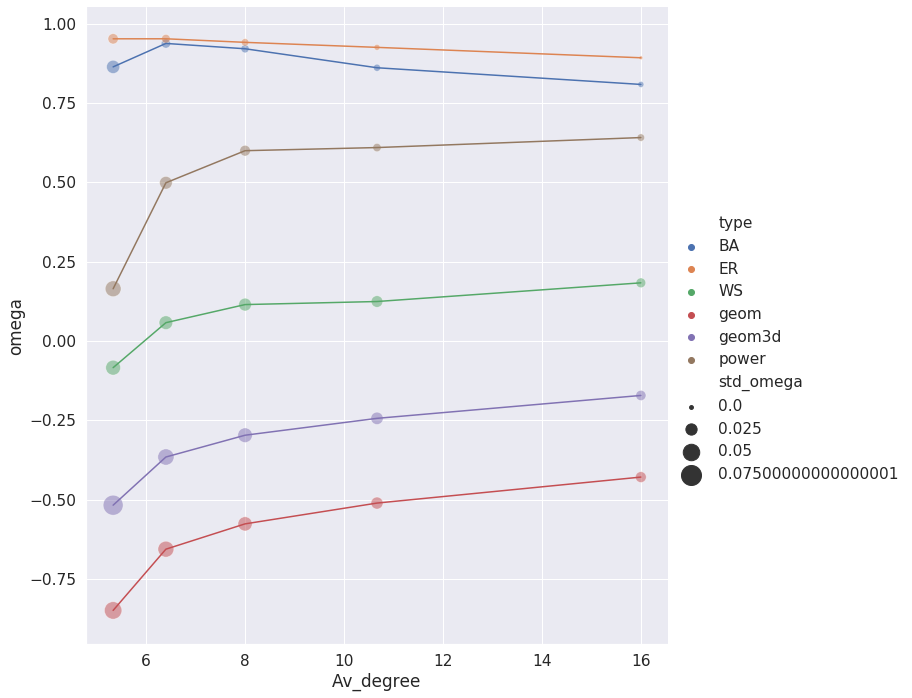

In [23]:

fg = sns.relplot(x = "Av_degree", y = "omega",size = "std_omega",kind = 'scatter',
                data = data,sizes = (15,400),hue = "type",alpha=.5,height = 10,
                facet_kws={'sharey': False, 'sharex': False})
# subsets for all graphs : 
BA = data[data["type"] == "BA"]
ER = data[data["type"] == "ER"]
WS = data[data["type"] == "WS"]
geom = data[data["type"] == "geom"]
geom3d = data[data["type"] == "geom3d"]
power = data[data["type"] == "power"]
# add lines : 
fg.axes[0,0].plot(BA["Av_degree"], BA["omega"])
fg.axes[0,0].plot(ER["Av_degree"], ER["omega"])
fg.axes[0,0].plot(WS["Av_degree"],WS["omega"])
fg.axes[0,0].plot(geom["Av_degree"], geom["omega"])
fg.axes[0,0].plot(geom3d["Av_degree"], geom3d["omega"])
fg.axes[0,0].plot(power["Av_degree"], power["omega"])

# #truncate legend texts:
# leg = fg._legend
# for t in leg.texts:
#     if len(t.get_text()) > 9:
#         t.set_text(t.get_text()[:5])
plt.show()

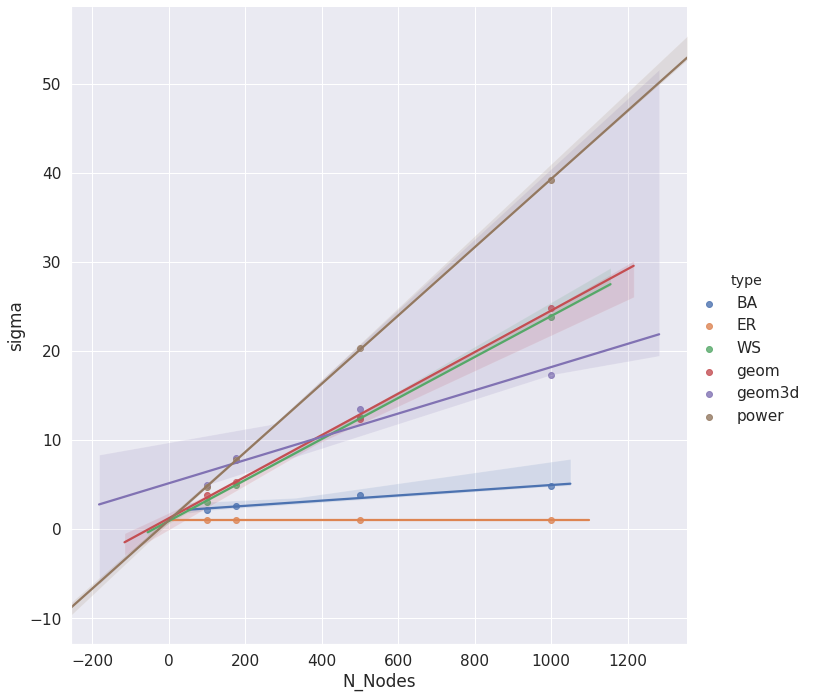

In [84]:
# plt.figure(figsize = (15,15))
sns.set(font_scale = 1.4)
x =  sns.lmplot("N_Nodes","sigma",hue = "type",data = data,
           fit_reg = True, height =10,
           scatter = True,
           #scatter_kws={'s': data["std_sigma"] * 200}
               )
#plt.show()

In [76]:
# plt.figure(figsize = (15,15))
sns.set(font_scale = 1.4)
x =  sns.lmplot("N_Nodes","sigma",hue = "type",data = data,
           fit_reg = True, height =10,
           scatter = True,
           scatter_kws={'s': data["CUMUL_STD"] * 200})